In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import time
%matplotlib inline
from imutils.video import count_frames
from scipy.spatial import distance as dist

In [2]:
#%matplotlib notebook

 # Video i/p 

In [3]:
#cap = cv2.VideoCapture("C:/Users/shrin/Documents/Abhilash/Export_2019-12-18_181852/0 - 2019-12-18 17-56-37-496.mov")
#cap = cv2.VideoCapture("C:/Users/shrin/Documents/Abhilash/New Slab/Export_2019-12-19_124059/0 - 2019-12-19 07-01-00-394.mov")
cap = cv2.VideoCapture("C:/Users/shrin/Documents/Abhilash/day-4 data/0 - 2019-12-19 19-35-05-273.mov")
totalFrames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
totalFrames

27270.0

In [31]:
cap.set(cv2.CAP_PROP_POS_FRAMES,21800)

True

In [32]:
#%matplotlib notebook

In [33]:
ret, frame = cap.read()
imgIP = "refImage.jpg"
#frame = cv2.imread(imgIP)
frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
test = frame.copy()
#print(frame.shape)
#plt.figure(figsize=(10,12))
#plt.imshow(frame)

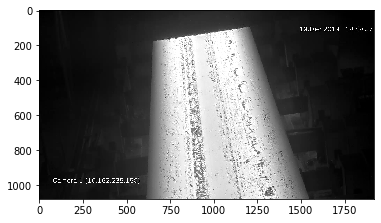

In [34]:
plt.imshow(frame)

In [35]:
#cv2.imwrite("day4_15390_2.jpg",frame)

In [37]:
yuv = cv2.cvtColor(frame.copy(),cv2.COLOR_RGB2YUV)

y,u,vb = cv2.split(yuv)

In [38]:
#%matplotlib notebook

In [39]:
#plt.figure(figsize=(10,12))
#plt.imshow(u,"gray")

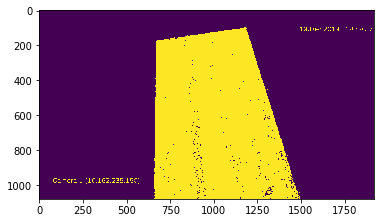

In [40]:
_,ythresh = cv2.threshold(y,112,255,cv2.THRESH_BINARY)
plt.imshow(ythresh)

In [41]:
r,g,b = cv2.split(frame.copy()) 

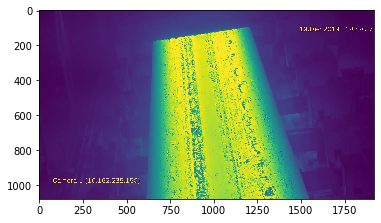

In [42]:
plt.imshow(r)

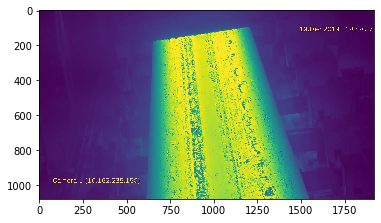

In [43]:
hsv = cv2.cvtColor(frame.copy(),cv2.COLOR_RGB2HSV)

h,s,v = cv2.split(hsv)
plt.imshow(v)

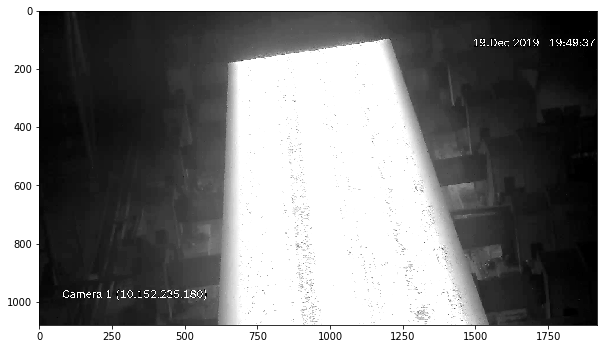

In [44]:
dst = cv2.addWeighted(v, 1, r, .801, 0.0)
plt.figure(figsize=(10,12))
plt.imshow(dst,"gray")

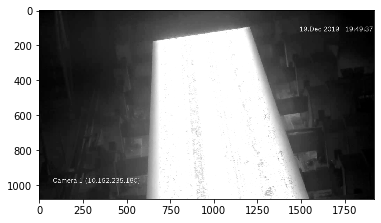

In [45]:
# ycbCr
blur = cv2.GaussianBlur(dst,(5,5),0)
plt.imshow(blur,"gray")

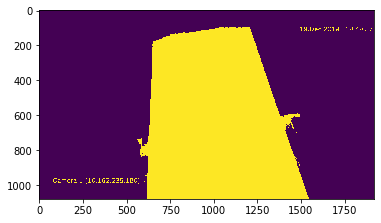

In [46]:
#thresh = cv2.adaptiveThreshold(dst.copy(),255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,501,-13)
_,thresh = cv2.threshold(blur,110,255,cv2.THRESH_BINARY)
plt.imshow(thresh)

In [47]:
np.count_nonzero(thresh[816,])

875

In [48]:
_ , contours, hierarchy =   cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

In [49]:
cnts = sorted(contours, key = cv2.contourArea,reverse= True)

blank = np.zeros((thresh.shape),dtype = np.uint8)
ordr = 0
epsilon = 0.0001*cv2.arcLength(cnts[0],True)
approx = cv2.approxPolyDP(cnts[0],epsilon,True)
blank = cv2.drawContours(blank,[approx],ordr,(255),2)
#blank = cv2.drawContours(blank,cnts,ordr,(255,255,0),1)

In [50]:
#%matplotlib notebook

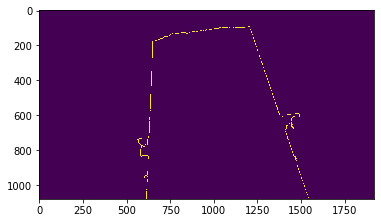

In [51]:
#plt.figure(figsize=(10,12))
plt.imshow(blank)

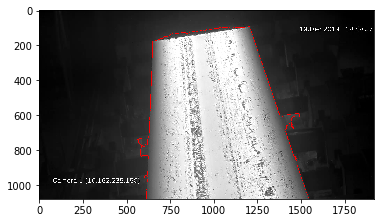

In [52]:
dstCnt = cv2.drawContours(frame,[approx],ordr,(255),2)
plt.imshow(dstCnt)

In [26]:
approx

array([[[   0,    0]],

       [[   0,  531]],

       [[   2,  532]],

       [[   2,  533]],

       [[   0,  534]],

       [[   0, 1079]],

       [[1919, 1079]],

       [[1919,  292]],

       [[1918,  291]],

       [[1919,  290]],

       [[1919,  244]],

       [[1915,  241]],

       [[1916,  240]],

       [[1919,  241]],

       [[1919,  200]],

       [[1916,  200]],

       [[1915,  199]],

       [[1916,  196]],

       [[1919,  197]],

       [[1919,  196]],

       [[1916,  195]],

       [[1916,  194]],

       [[1919,  192]],

       [[1919,  188]],

       [[1918,  187]],

       [[1919,  184]],

       [[1916,  182]],

       [[1916,  180]],

       [[1919,  179]],

       [[1919,  169]],

       [[1916,  170]],

       [[1914,  169]],

       [[1915,  166]],

       [[1918,  167]],

       [[1917,  165]],

       [[1919,  163]],

       [[1919,  159]],

       [[1916,  158]],

       [[1918,  156]],

       [[1917,  150]],

       [[1919,  149]],

       [[1919,  

In [27]:
aaaaaaa = np.squeeze(approx)
print(aaaaaaa.shape)

(296, 2)


In [28]:
aaaaaaa[:,1]

array([   0,  531,  532,  533,  534, 1079, 1079,  292,  291,  290,  244,
        241,  240,  241,  200,  200,  199,  196,  197,  196,  195,  194,
        192,  188,  187,  184,  182,  180,  179,  169,  170,  169,  166,
        167,  165,  163,  159,  158,  156,  150,  149,  132,  132,  137,
        135,  129,  128,  130,  128,  126,  126,  128,  127,  121,  126,
        124,  127,  126,  125,  124,  120,  114,  112,  110,  109,  107,
        110,  114,  115,  115,  114,  115,  119,  119,  120,  124,  123,
        128,  128,  127,  125,  124,  125,  132,  133,  133,  135,  133,
        131,  129,  128,  125,  125,  129,  131,  129,  125,  118,  121,
        125,  125,  126,  124,  122,  119,  125,  124,  125,  123,  121,
        117,  117,  119,  123,  123,  124,  124,  120,  120,  124,  124,
        121,  119,  121,  123,  124,  123,  124,  124,  125,  116,  112,
        106,  100,   93,   92,   92,   90,   95,  102,  104,  106,  100,
         99,   98,   94,   90,   89,   91,   92,   

In [29]:
np.where(aaaaaaa[:,1] == 818)

(array([], dtype=int64),)

In [30]:
aaaaaaa[607]

IndexError: index 607 is out of bounds for axis 0 with size 296

In [ ]:
#from scipy import optimize

In [ ]:
#cv2.imwrite("day3_10260_5.jpg",frame)

In [ ]:
frame.shape

In [ ]:
#%matplotlib notebook

In [ ]:
plt.imshow(frame)

In [ ]:
alar = [636,816,1423,700]

In [ ]:
np.count_nonzero(thresh[700,])

In [ ]:
break

In [ ]:
830*2

In [ ]:
np.nonzero(thresh[816,])[0][-1]

In [ ]:
1457-628

In [ ]:
#np.logical_and(cnts[0],test) == [True, True]

In [ ]:
#plt.imshow(thresh[735:735+100,])

In [ ]:
alar[1] - alar[3]

In [ ]:
alar[2] - alar[0]

In [ ]:
refImage = frame.copy()
'''for num,i in enumerate (refPoints):
    cv2.line(refImage,(i[0],i[1]),(i[2],i[3]),(0,255,0),3)
    #cv2.putText(refImage,"num",(850,i[1]),2,255,5,cv2.FONT_HERSHEY_SIMPLEX)'''
cv2.line(refImage,(alar[0],alar[1]),(alar[2],alar[3]),(0,255,0),3)
plt.figure(figsize=(10,12))
plt.imshow(refImage)

In [ ]:
#%matplotlib notebook

In [ ]:
#plt.imshow(refImage)

# pixels Per Metric

In [ ]:
drawLine = frame.copy()

dB = dist.euclidean(alar[:2],alar[-2:])
pixelsPerMetric = dB / 1690
print(1/pixelsPerMetric,"<<<<<-----------------MM per Pix")


In [ ]:
while(True):
    ret, img = cap.read()
    
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    r,g,b = cv2.split(img.copy()) 
    hsv = cv2.cvtColor(img .copy(),cv2.COLOR_RGB2HSV)
    h,s,v = cv2.split(hsv)
    
    dst = cv2.addWeighted(v, 1, r, .801, 0.0)
    
    blur = cv2.GaussianBlur(dst,(5,5),0)
    _,thresh = cv2.threshold(blur,110,255,cv2.THRESH_BINARY)
    cnts = sorted(contours, key = cv2.contourArea,reverse= True)

    # cntr Order
    ordr = 0
    epsilon = 0.0001*cv2.arcLength(cnts[0],True)
    approx = cv2.approxPolyDP(cnts[0],epsilon,True)
    dstCnt = cv2.drawContours(img.copy(),[approx],ordr,(255),2)
    
    #if np.count_nonzero(thresh[816,0]) >= 500:
    print(np.count_nonzero(thresh[816,0]))
    #print((1/pixelsPerMetric)* (np.nonzero(thresh[816,0])[0][-1] - np.nonzero(thresh[816,0])[0][0]))
     #img  = cv2.line(img ,(np.nonzero(thresh[816,0])[0][0],alar[1]),((np.nonzero(thresh[816,0])[0][-1]),alar[3]),(0,255,0),0)



    
    img1 = cv2.resize(img ,(500,300))
    img2 = cv2.resize(dstCnt,(500,300))
    img3 = cv2.resize(thresh,(500,300))
    cv2.imshow('img ',img2)
    #cv2.imshow('img ',img 2)
    #cv2.imshow('img ',img 3)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()